In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


In [2]:
# Import all the relevant libraries used in this project 

# To handle table like data and matrices
import numpy as np
import pandas as pd
import math

# modelling Algorithms

# Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

# preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Evaluation metrics

# Regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Visualisation 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set_theme(context="notebook", palette="dark", style = 'whitegrid', color_codes = True)
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': "x-large",
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)
print('importes required libraries')

importes required libraries


In [3]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");
print('graph related setting')

graph related setting


In [4]:
df = pd.read_csv(r'/kaggle/input/diamonds/diamonds.csv')
diamonds = df.copy()

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Carat** : Carat weight of Diamond  
**Cut** : Cut quality  
**Clarity** : refers to absence of the Inclusions and Blemishes. from best FL = flawless to l3 = Level 3 inclusions. ( FL, IF, VVS1, VVS2, VD=S1, VS2, Sl1, Sl2, l1, l2, l3)  
**x** : length of the Diamond in mm  
**y** : width of Diaond in mm  
**z** : height of Diamond in mm  
**Price** : Price of Diamond  
**Table** : width of Diamonds table expressed as a percentage of its average diameter  
**Depth** : height of Diamond measured from the Culet of the table divided by its average girdle diameter  

Droping the 'Unnamed: 0' column as we already have the index.

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.shape

(53940, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Axes: >

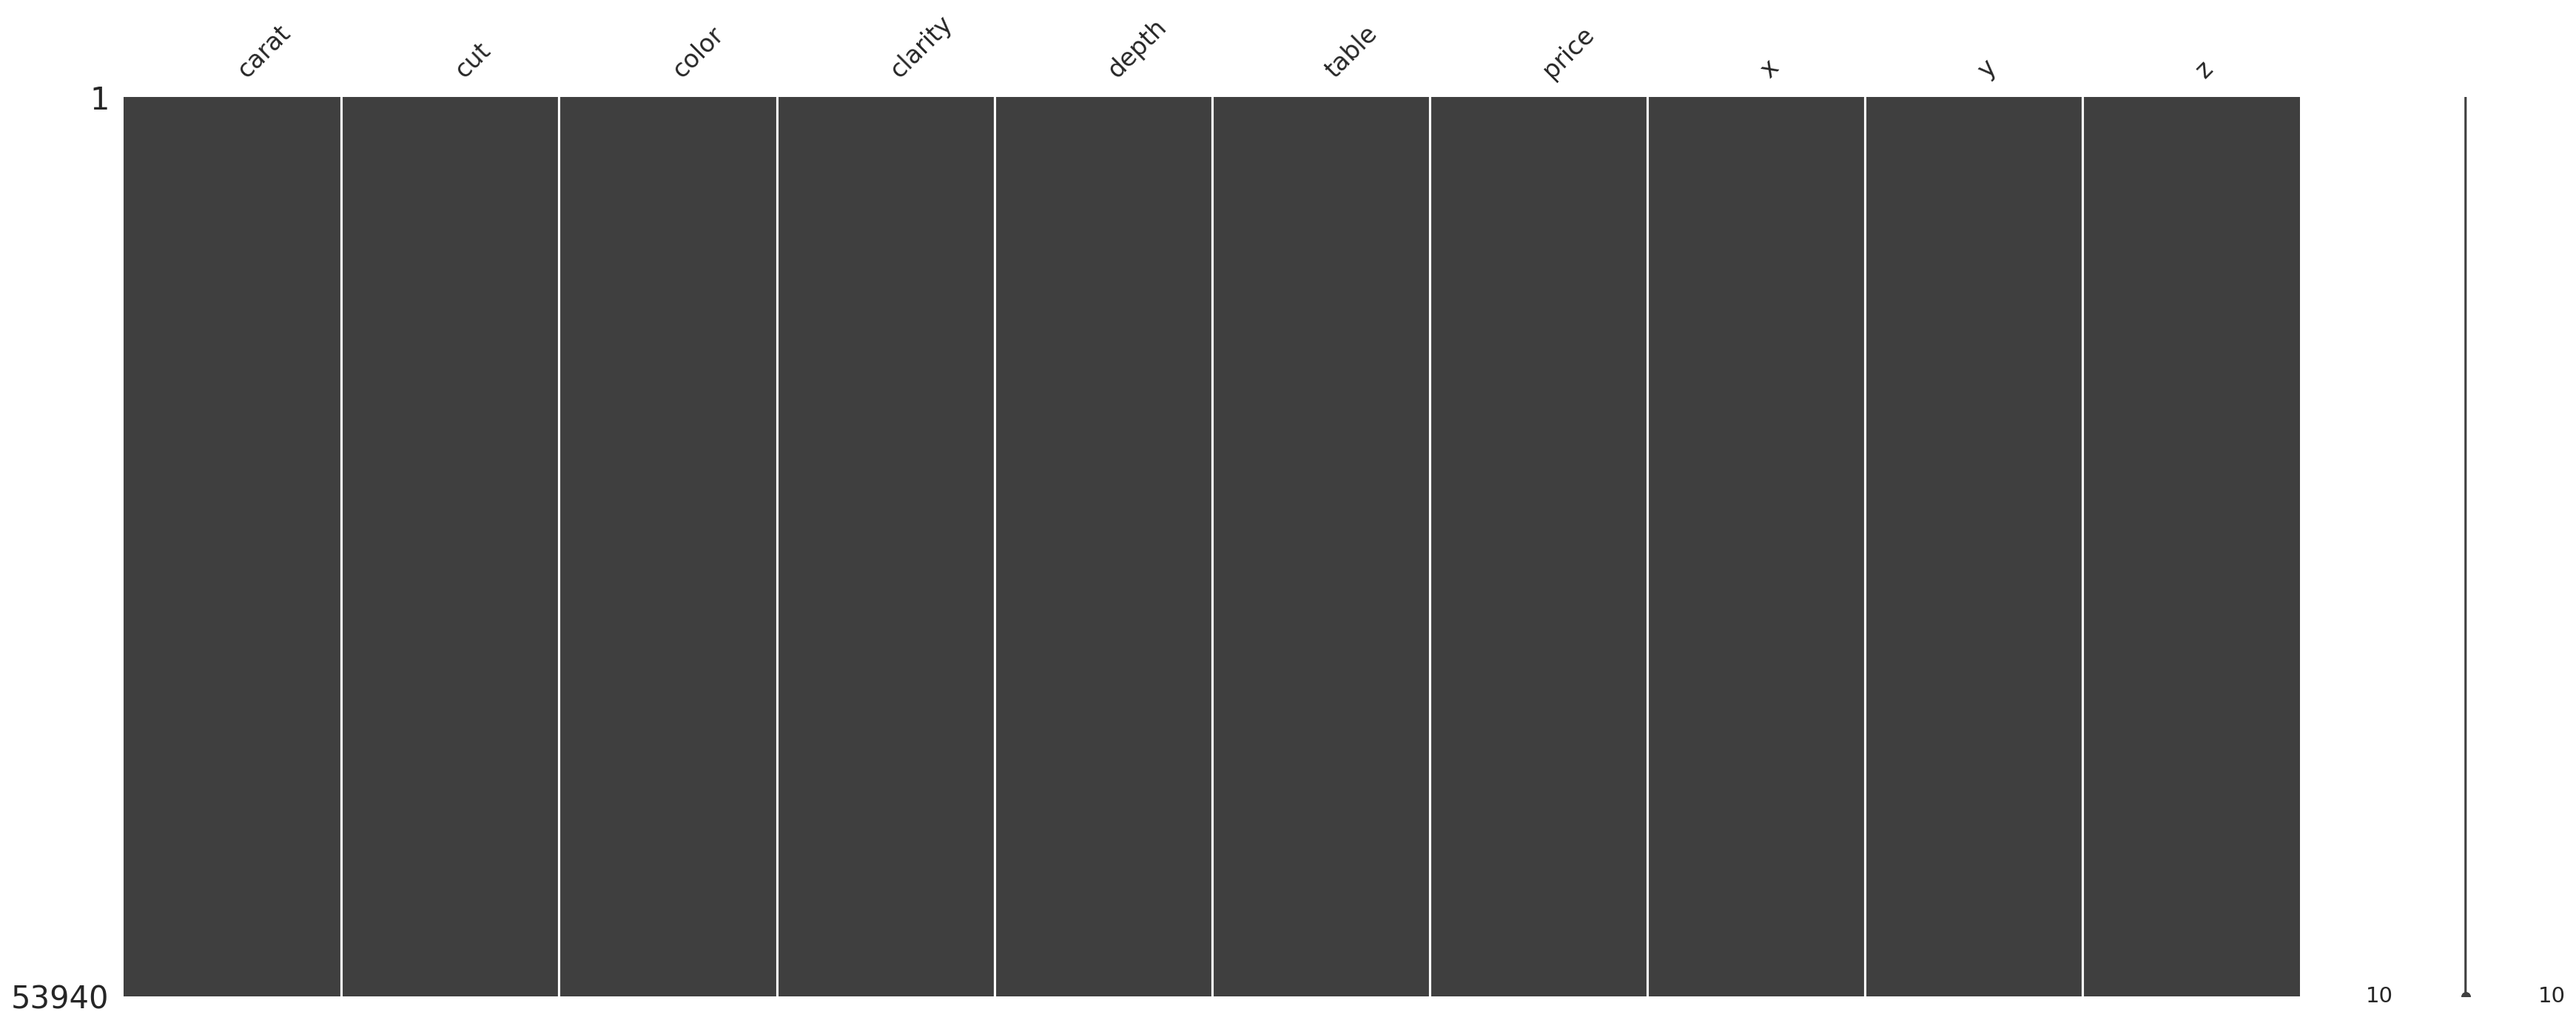

In [9]:
# Let's visualize to see no missing values in dataset
msno.matrix(df)
# ValueError: keyword grid_b is not recognized
# recent update of matplotlib changed argument b to visible , 
# Solution: get into missingno.py, search for grid(b=False) and update it to grid(visible=False). There should be 3 occurrences.
# https://github.com/ResidentMario/missingno/pull/162/files

Great, so no NaN values

In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
# Checking why the min , max of x, y, z is 0
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [12]:
# Dropping these 20 records as better not to add them with any of mean or median
df = df[(df[['x', 'y', 'z']] != 0).all(axis=1)]

# Just to confirm
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


Scalling all Features

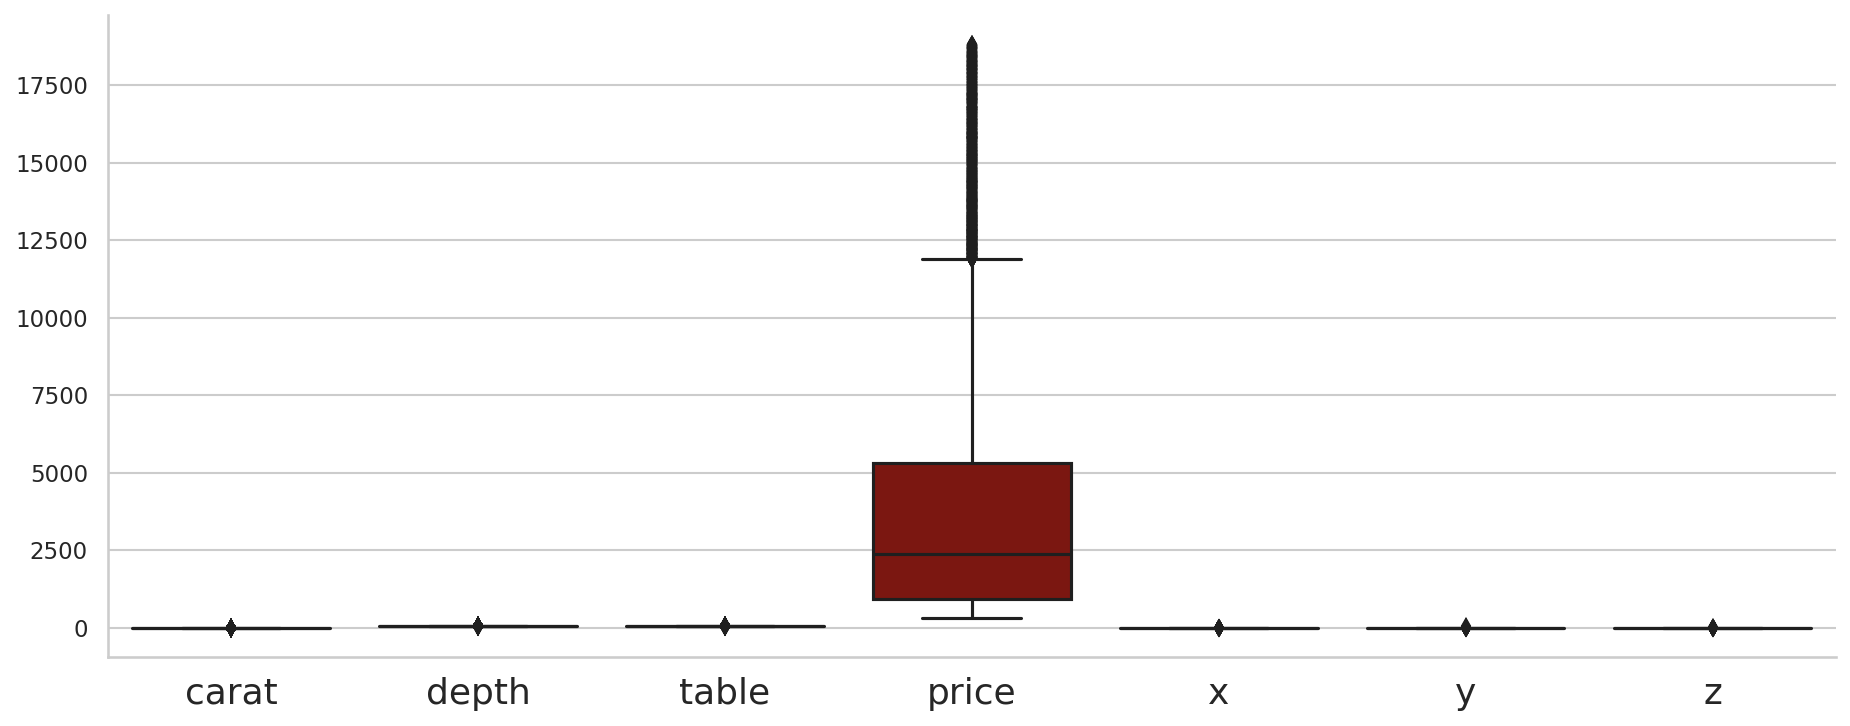

In [13]:
sns.catplot(data=df, kind='box', aspect=2.5)

We see values are Distributed over a small scale

# Correlation between Features

<Axes: >

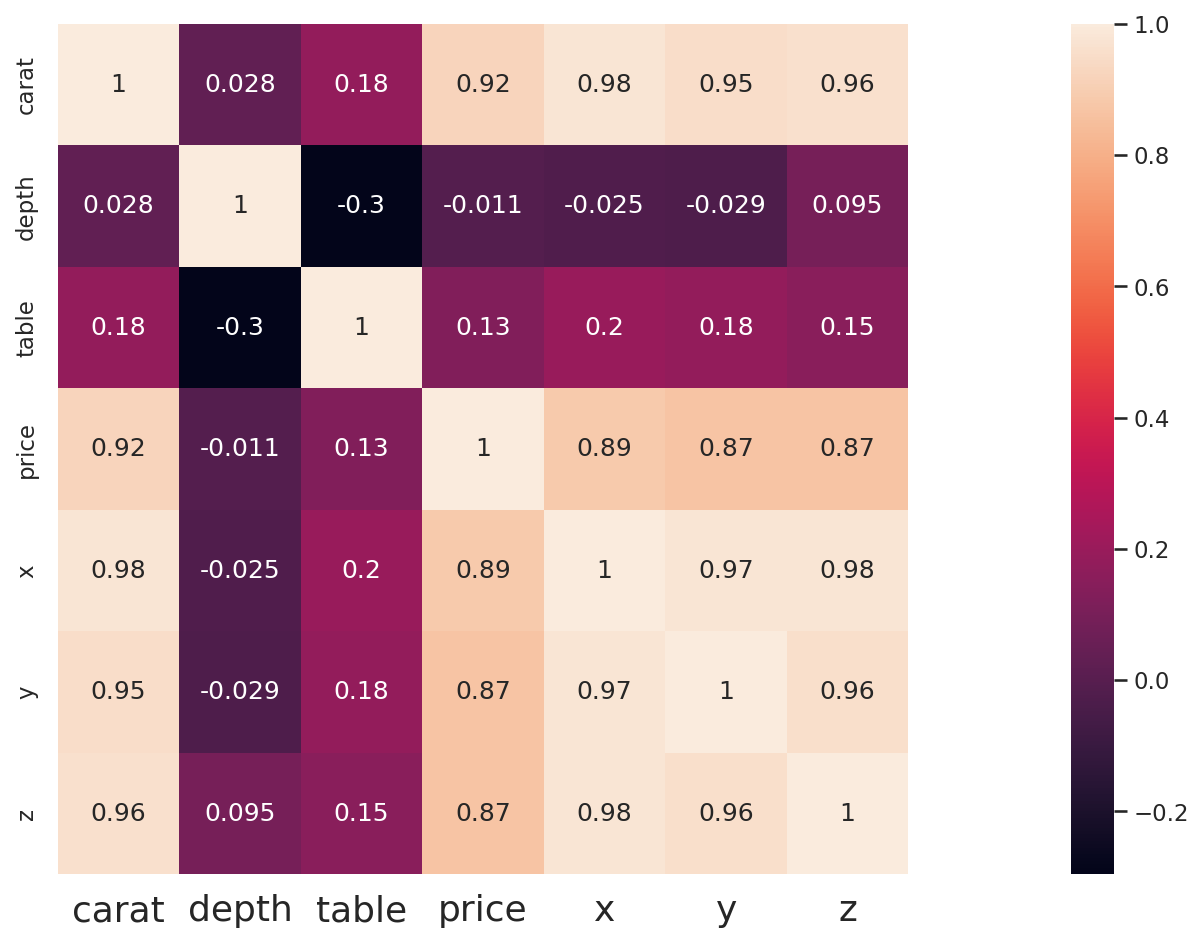

In [14]:
# Correlation Map
corr = df.corr(numeric_only=True)
sns.heatmap(data=corr, square=True, annot=True, cbar=True)

- Looks like depth is inversely related to Price  
- Price is highly correlated to Carat and its Dimension  
- weight( Carat ) of diamond has most significant impact on its price  
- x(length), y(width), z(height) seems highly related to Price and even each other

# Visualization Of All Features

1) Carat

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carat', ylabel='Density'>

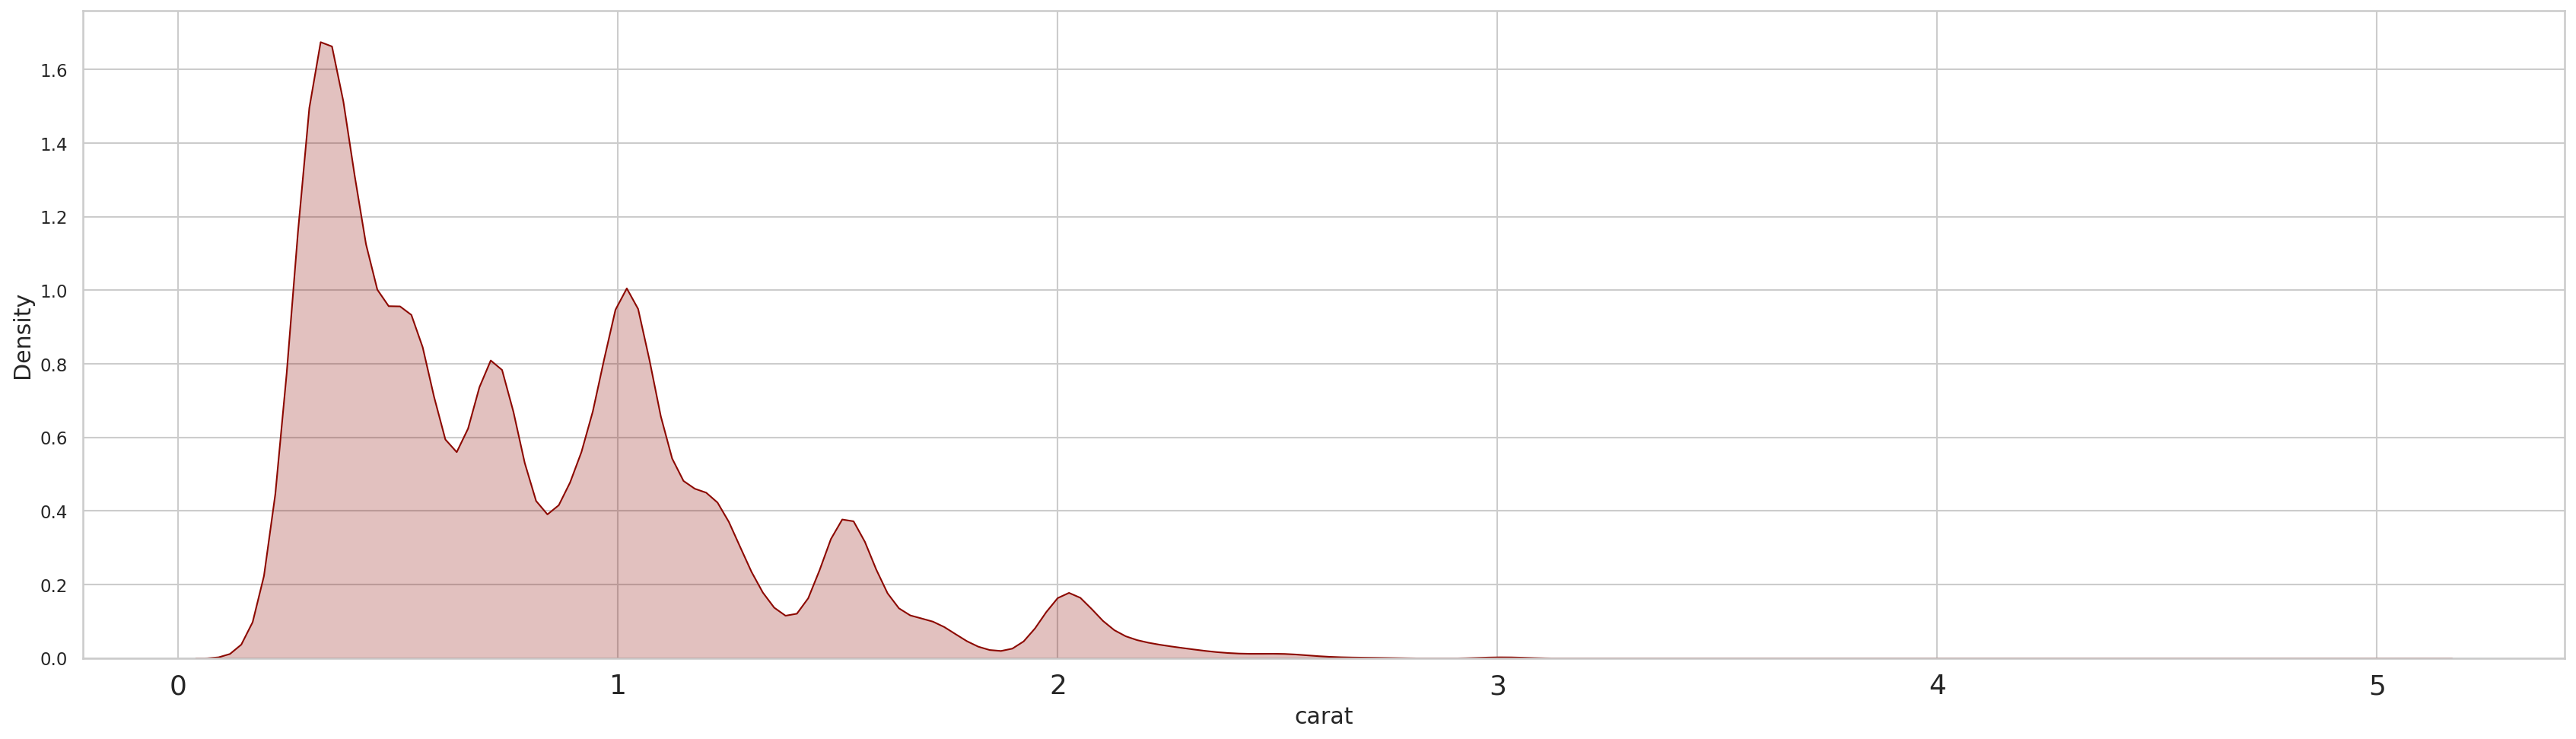

In [15]:
# Visualize via kde plots 
sns.kdeplot(df['carat'], fill=True, color='r')

2) Carat vs Price

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


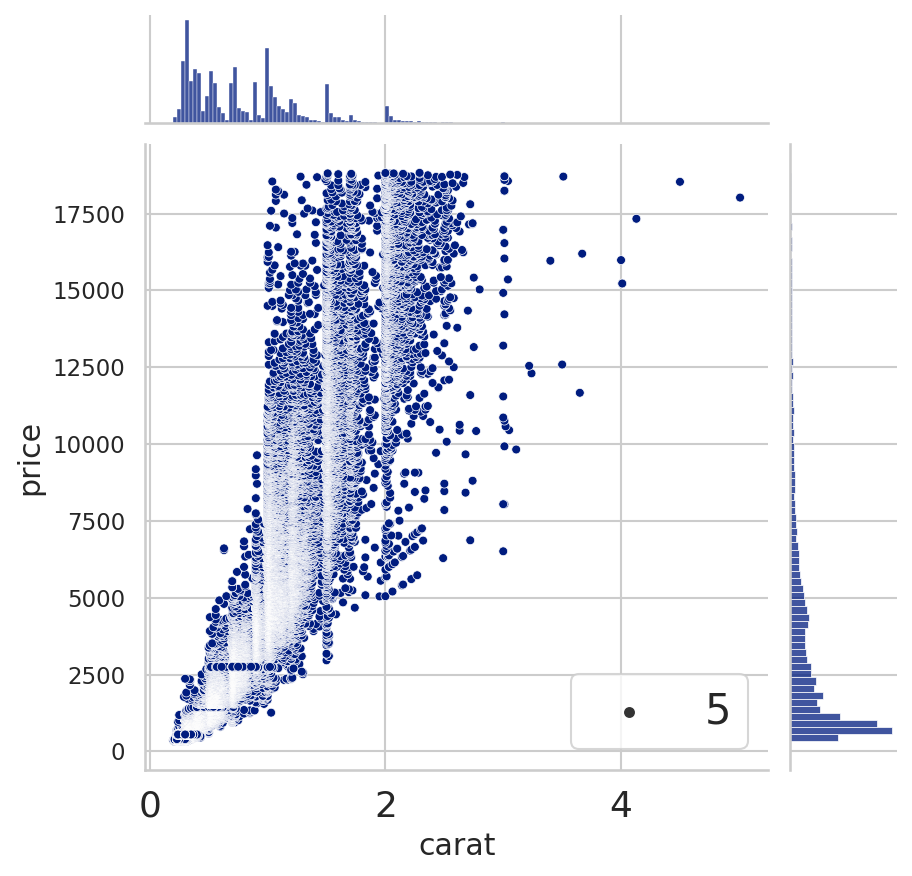

In [16]:
sns.jointplot(x = 'carat', y = 'price', data = df, size = 5)

Carat varies with Price exponentially

3) Cut

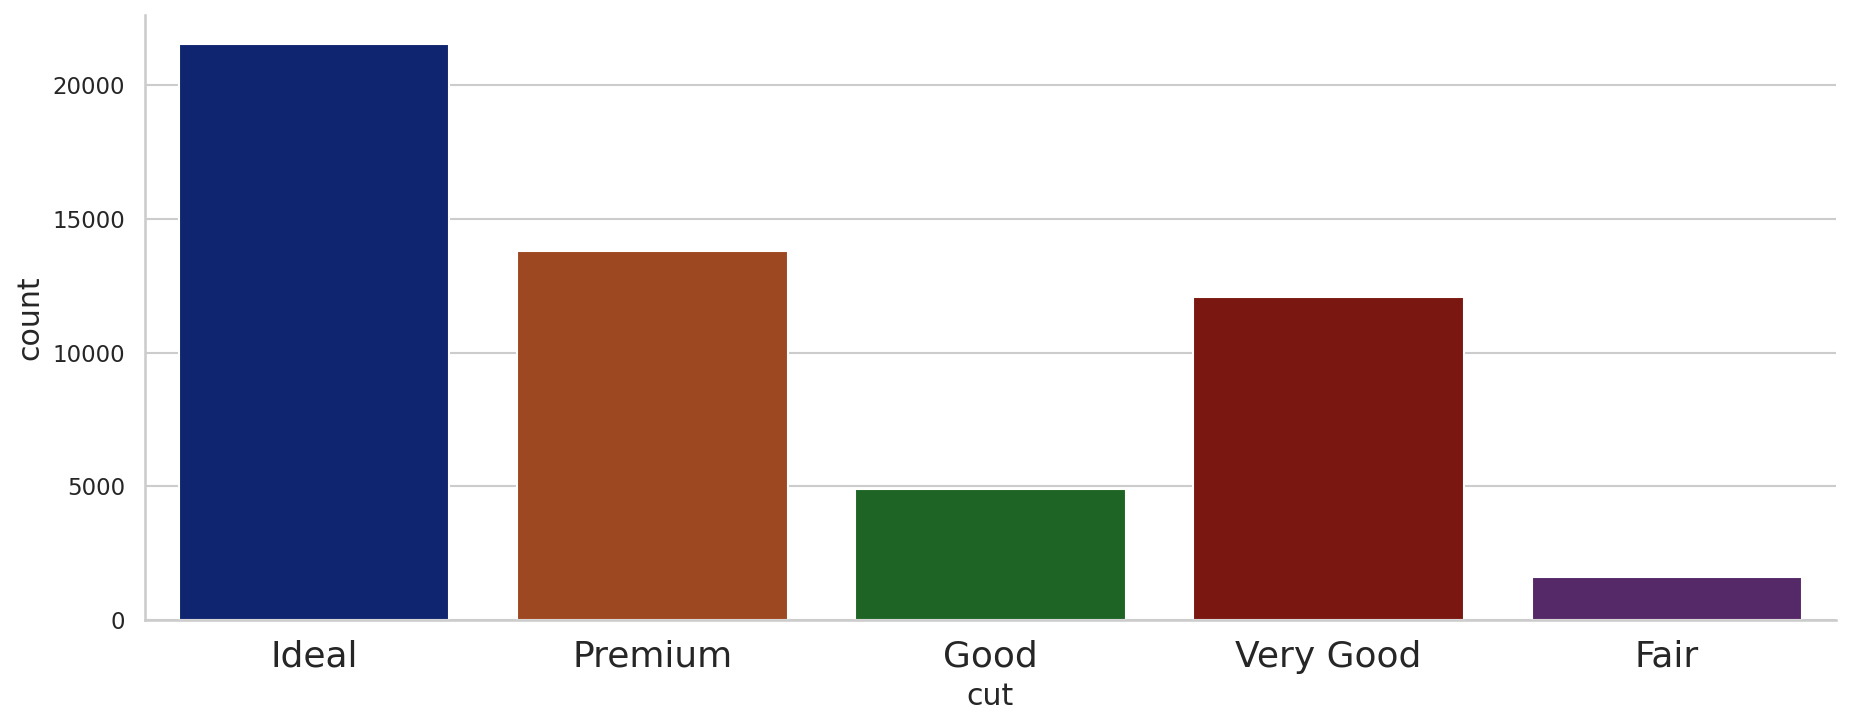

In [17]:
sns.catplot(x='cut', data=df, kind='count', aspect=2.5)

4) Cut vs Price

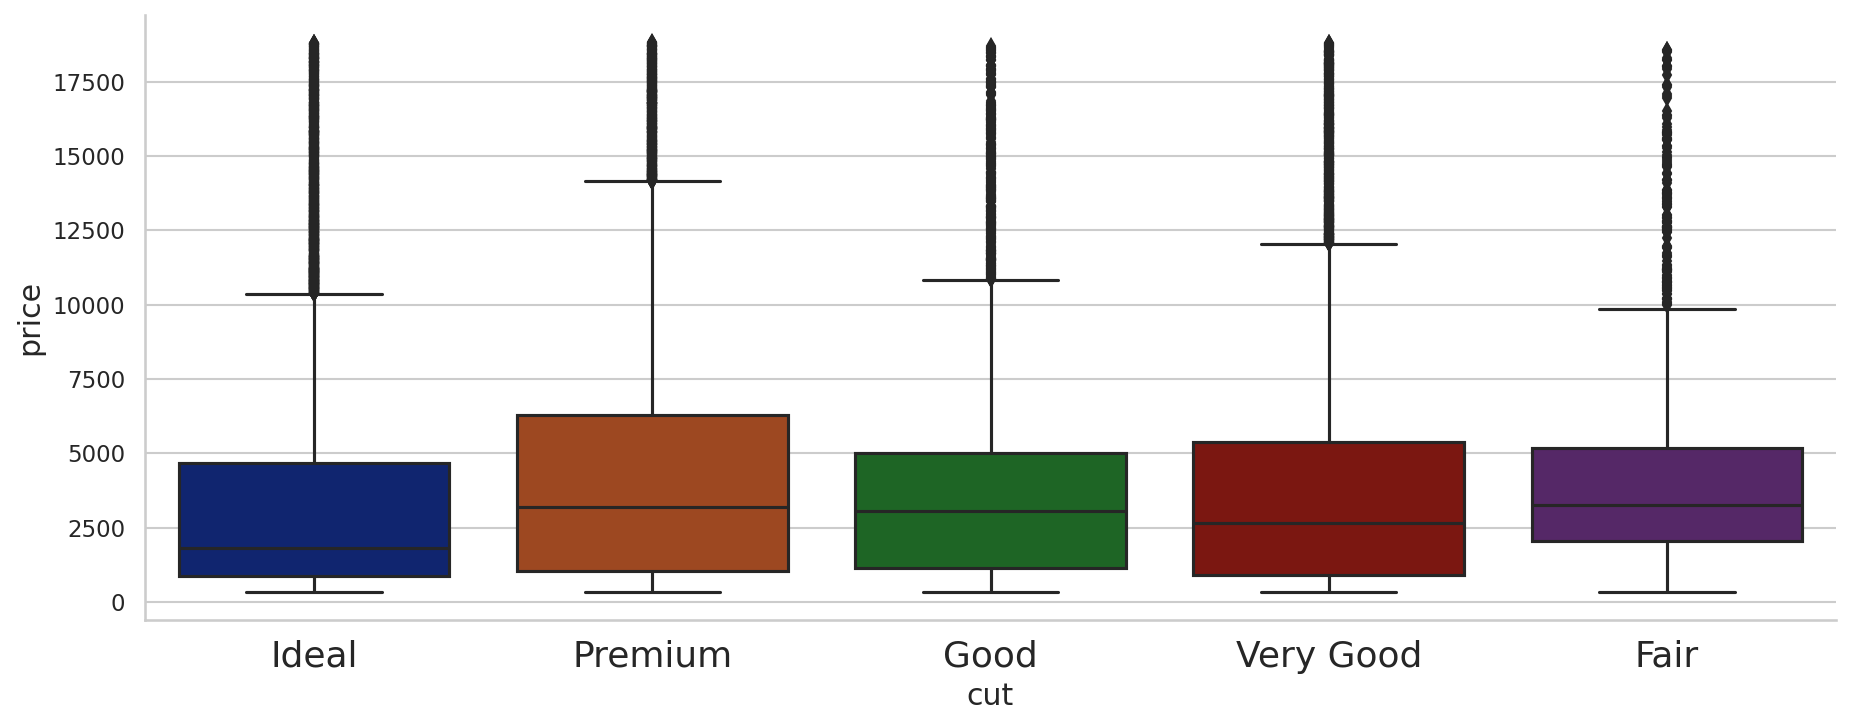

In [18]:
sns.catplot(x='cut', y='price', data=df, kind='box', aspect=2.5)
# In a box plot
# The bottom line indicates the min value.
# The upper line indicates the max value.
# The middle line of the box is the median or the 50% percentile.
# The side lines of the box are the 25 and 75 percentiles respectively.

Premium Cut on Diamonds as we can see they are the most Expensive, followed by Very Good

5) Color

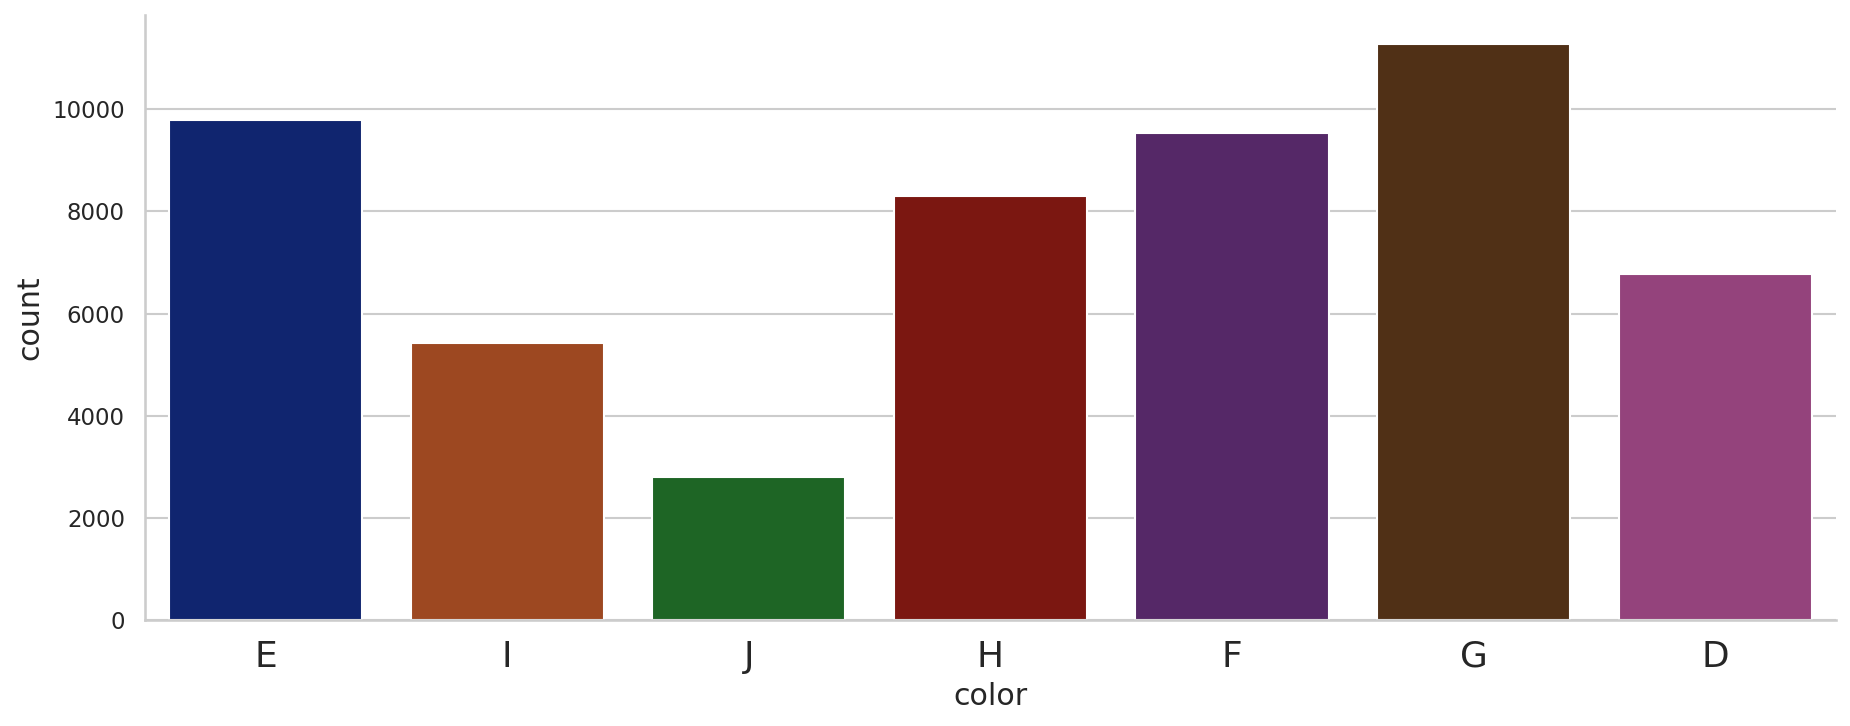

In [19]:
sns.catplot(x='color', data=df, kind='count', aspect=2.5)

6) Color vs Price

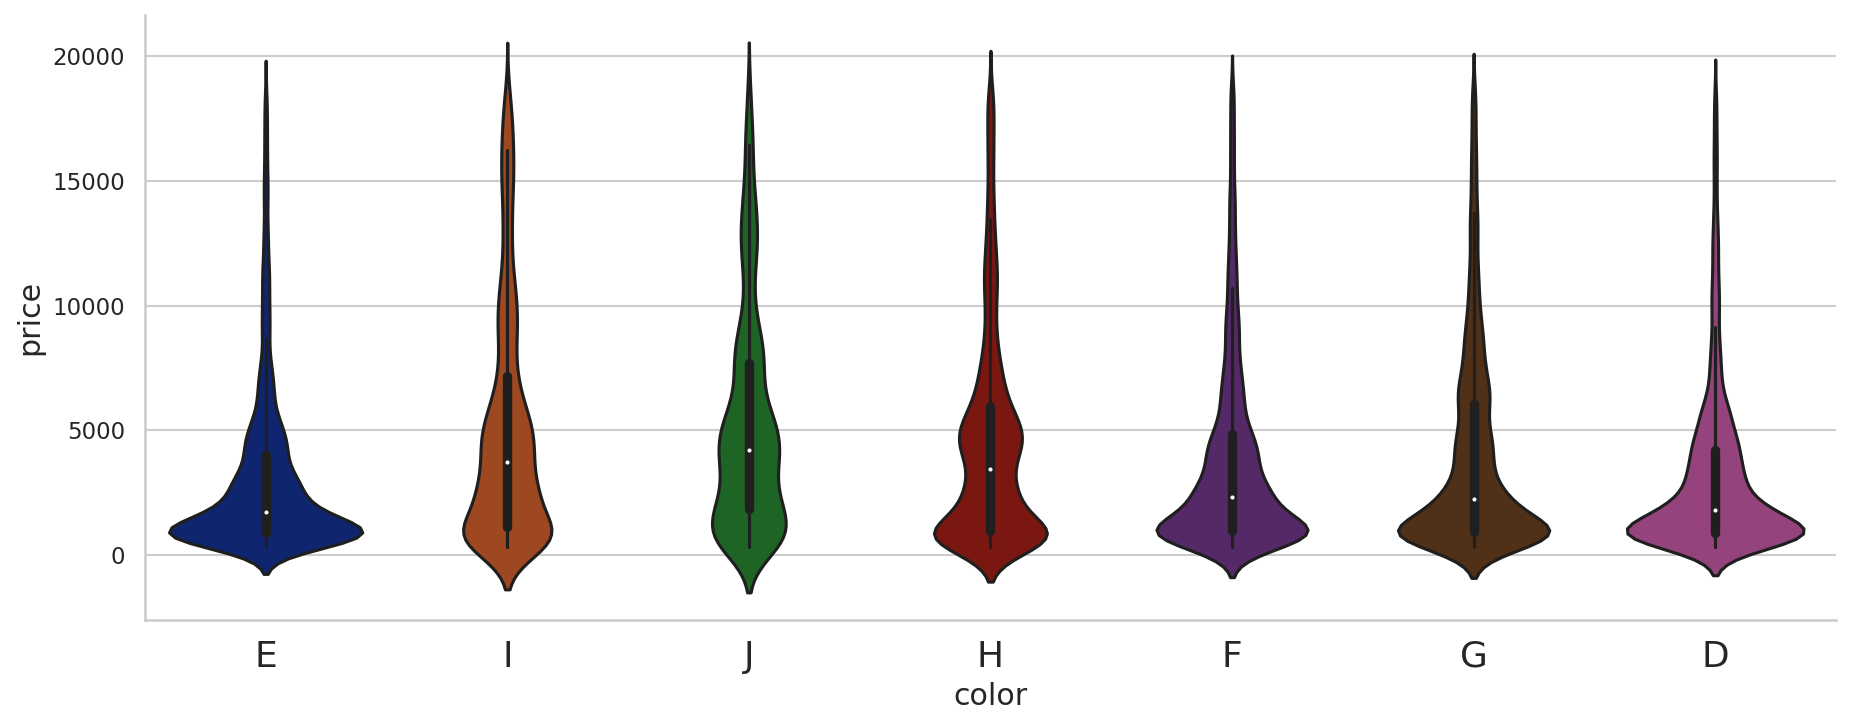

In [20]:
sns.catplot(x='color', y='price', data=df, kind='violin', aspect=2.5)

7) Clarity

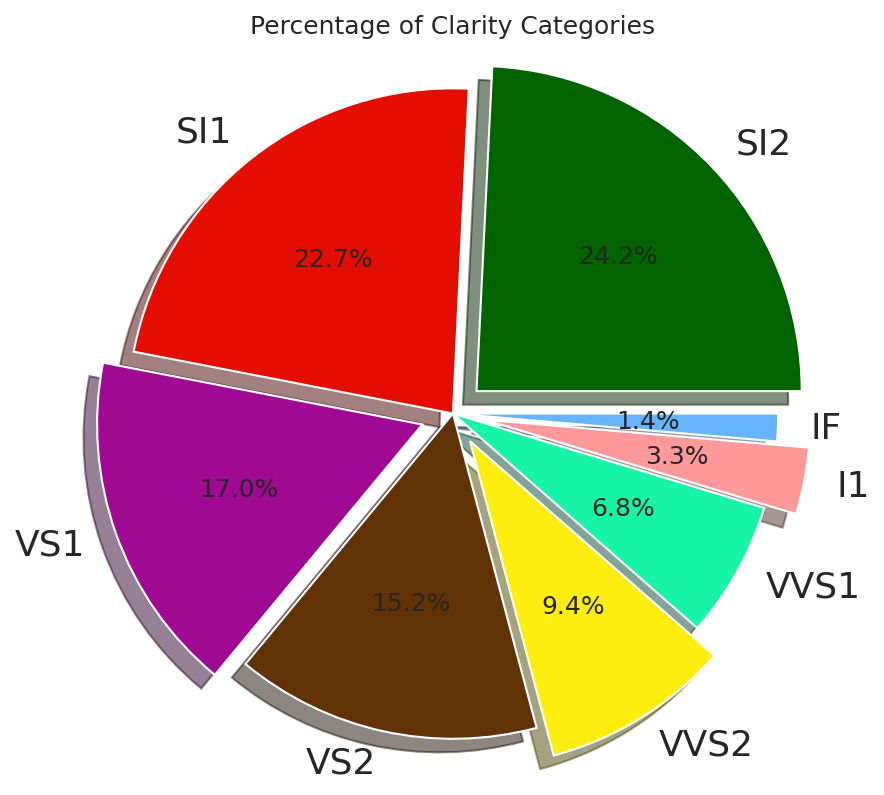

In [21]:
labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

8) Clarity vs Price

<Axes: xlabel='clarity', ylabel='price'>

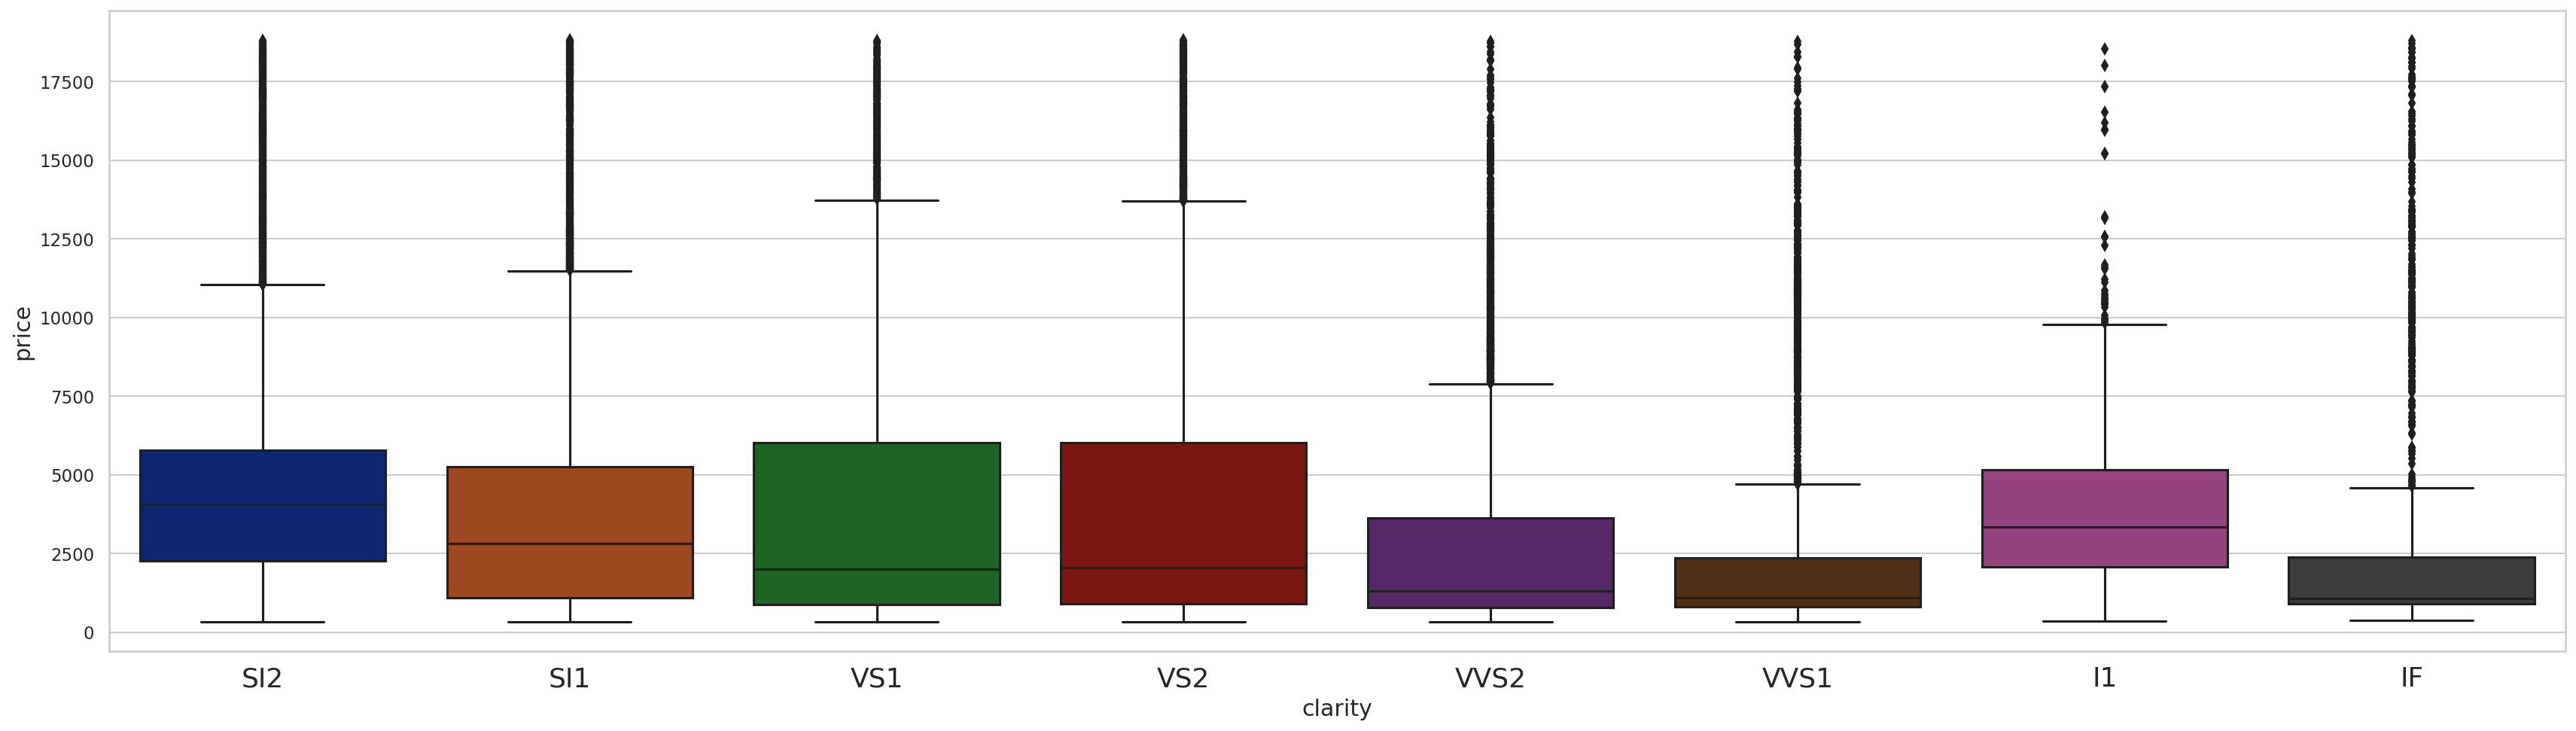

In [22]:
sns.boxplot(x = 'clarity', y = 'price', data=df)

Seems like VS1 and VS2  affect the Diamond Price equally having quite high Price margin

9) Depth

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 1.1000e+01, 4.3000e+01, 2.1900e+02,
        1.4240e+03, 5.0730e+03, 1.8242e+04, 2.2649e+04, 5.0330e+03,
        8.5100e+02, 2.3400e+02, 8.7000e+01, 2.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([43.  , 44.44, 45.88, 47.32, 48.76, 50.2 , 51.64, 53.08, 54.52,
        55.96, 57.4 , 58.84, 60.28, 61.72, 63.16, 64.6 , 66.04, 67.48,
        68.92, 70.36, 71.8 , 73.24, 74.68, 76.12, 77.56, 79.  ]),
 <BarContainer object of 25 artists>)

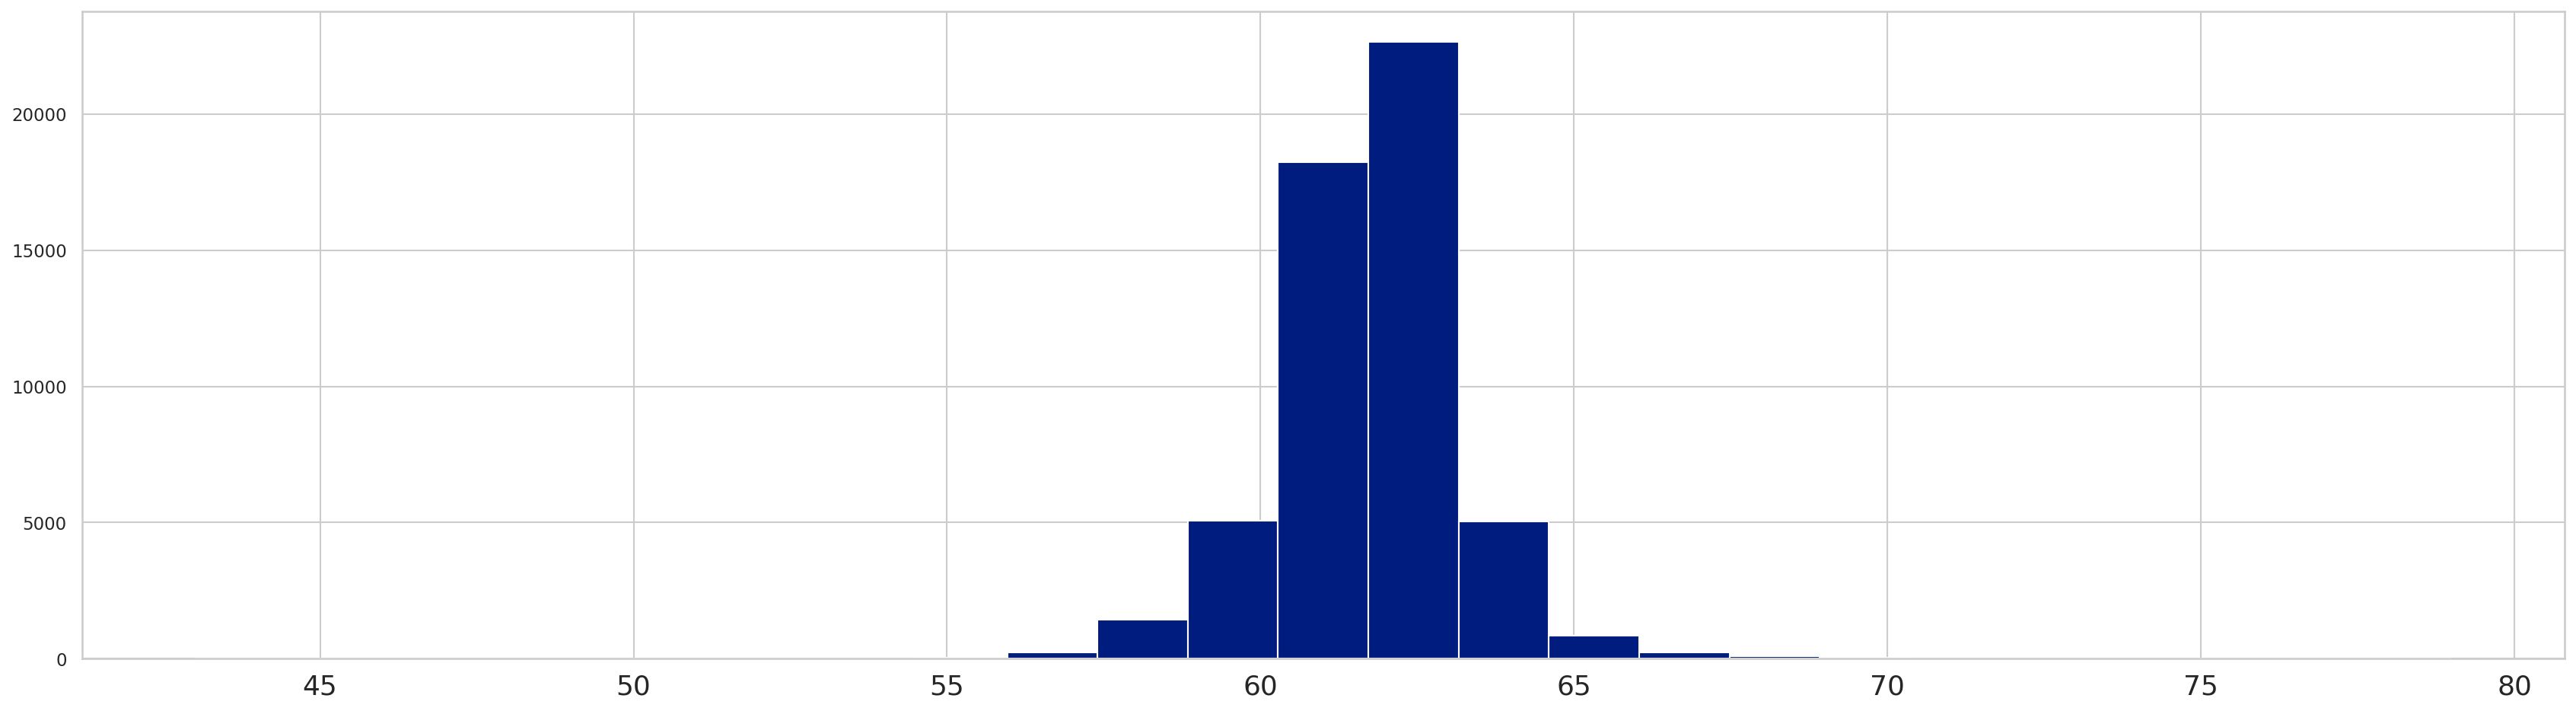

In [23]:
plt.hist('depth', data=df, bins=25)

10) Depth vs Price

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


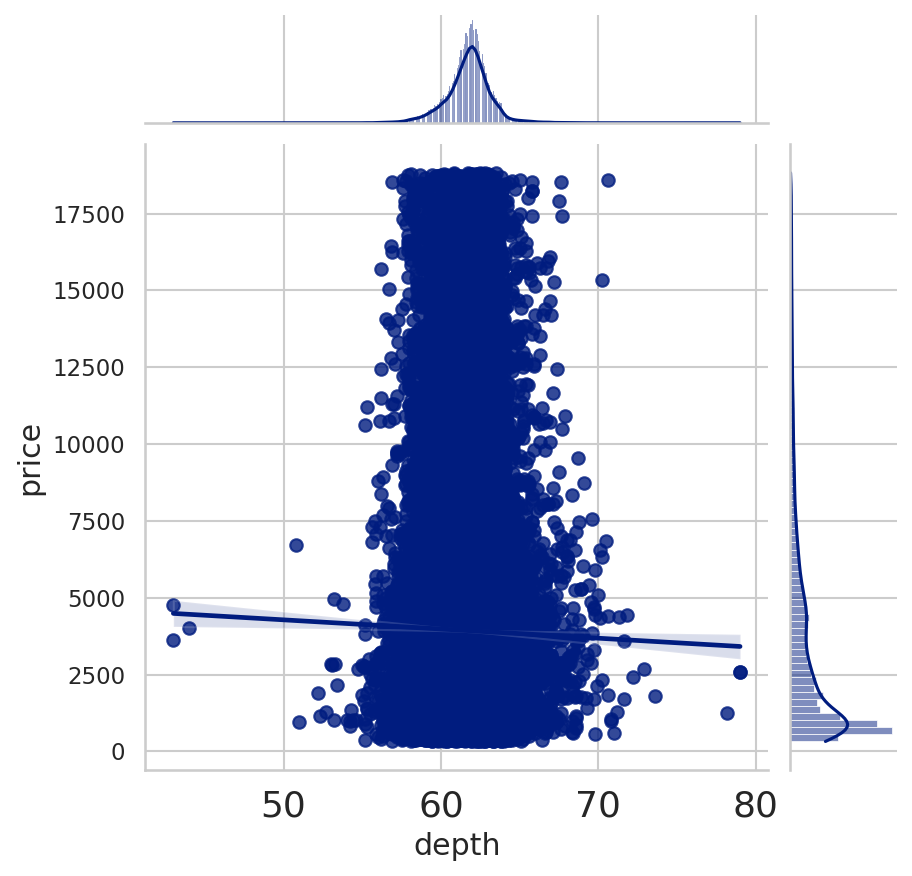

In [24]:
sns.jointplot(x='depth', y='price', data=df, kind='reg')

Looks like Price vary heavily for the same depth
And the Pearson's Correlation shows slightly inverse relation between the two

11) Table

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='table', ylabel='Density'>

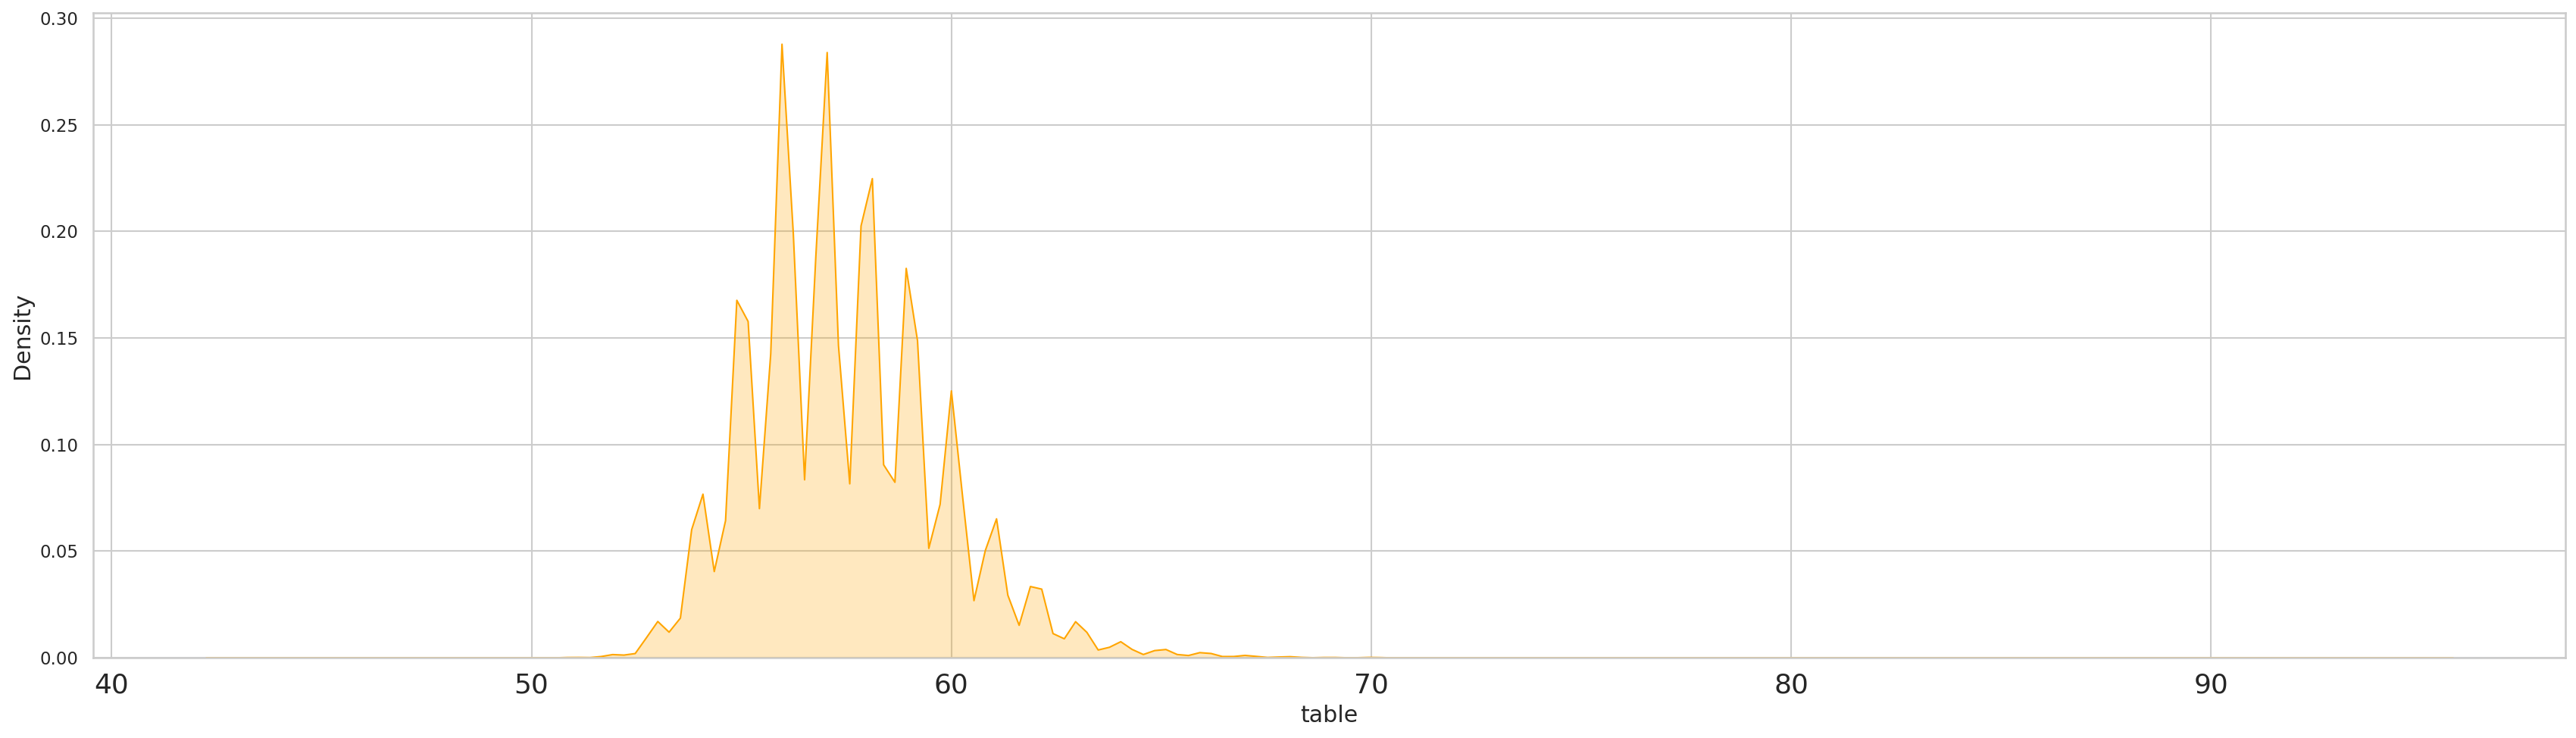

In [25]:
sns.kdeplot(df['table'], fill=True, color='orange')

12) Table vs Price

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


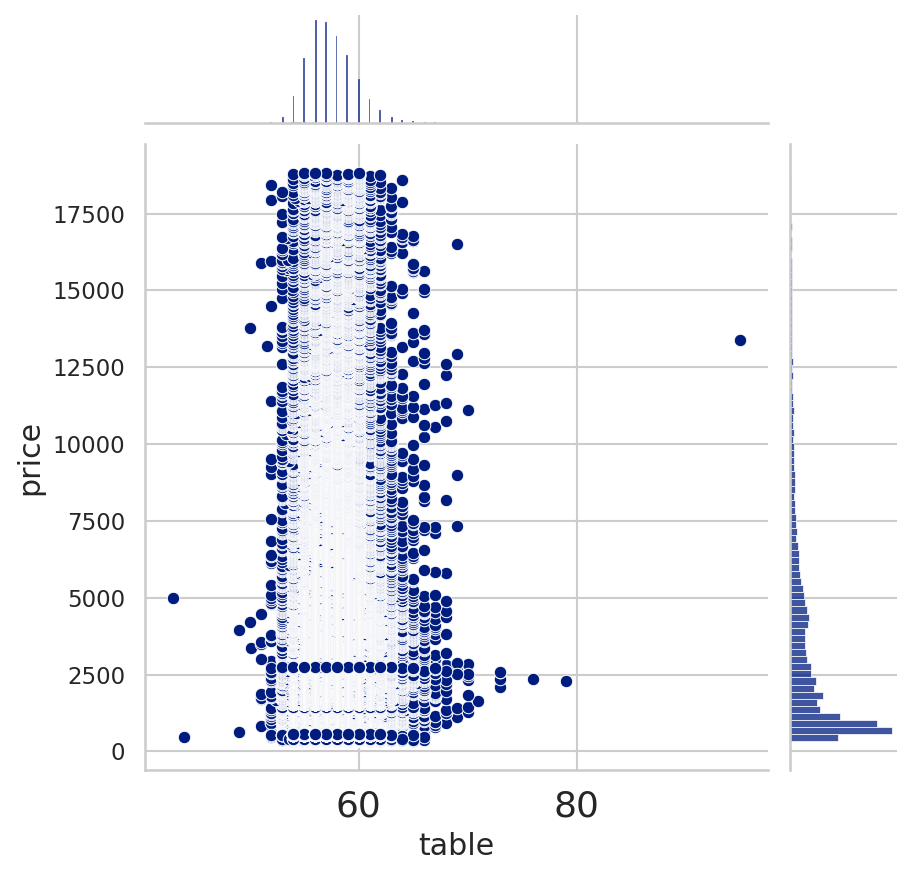

In [26]:
sns.jointplot(x='table', y='price', data=df)

13) Dimensions

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(2.0, 10.0)

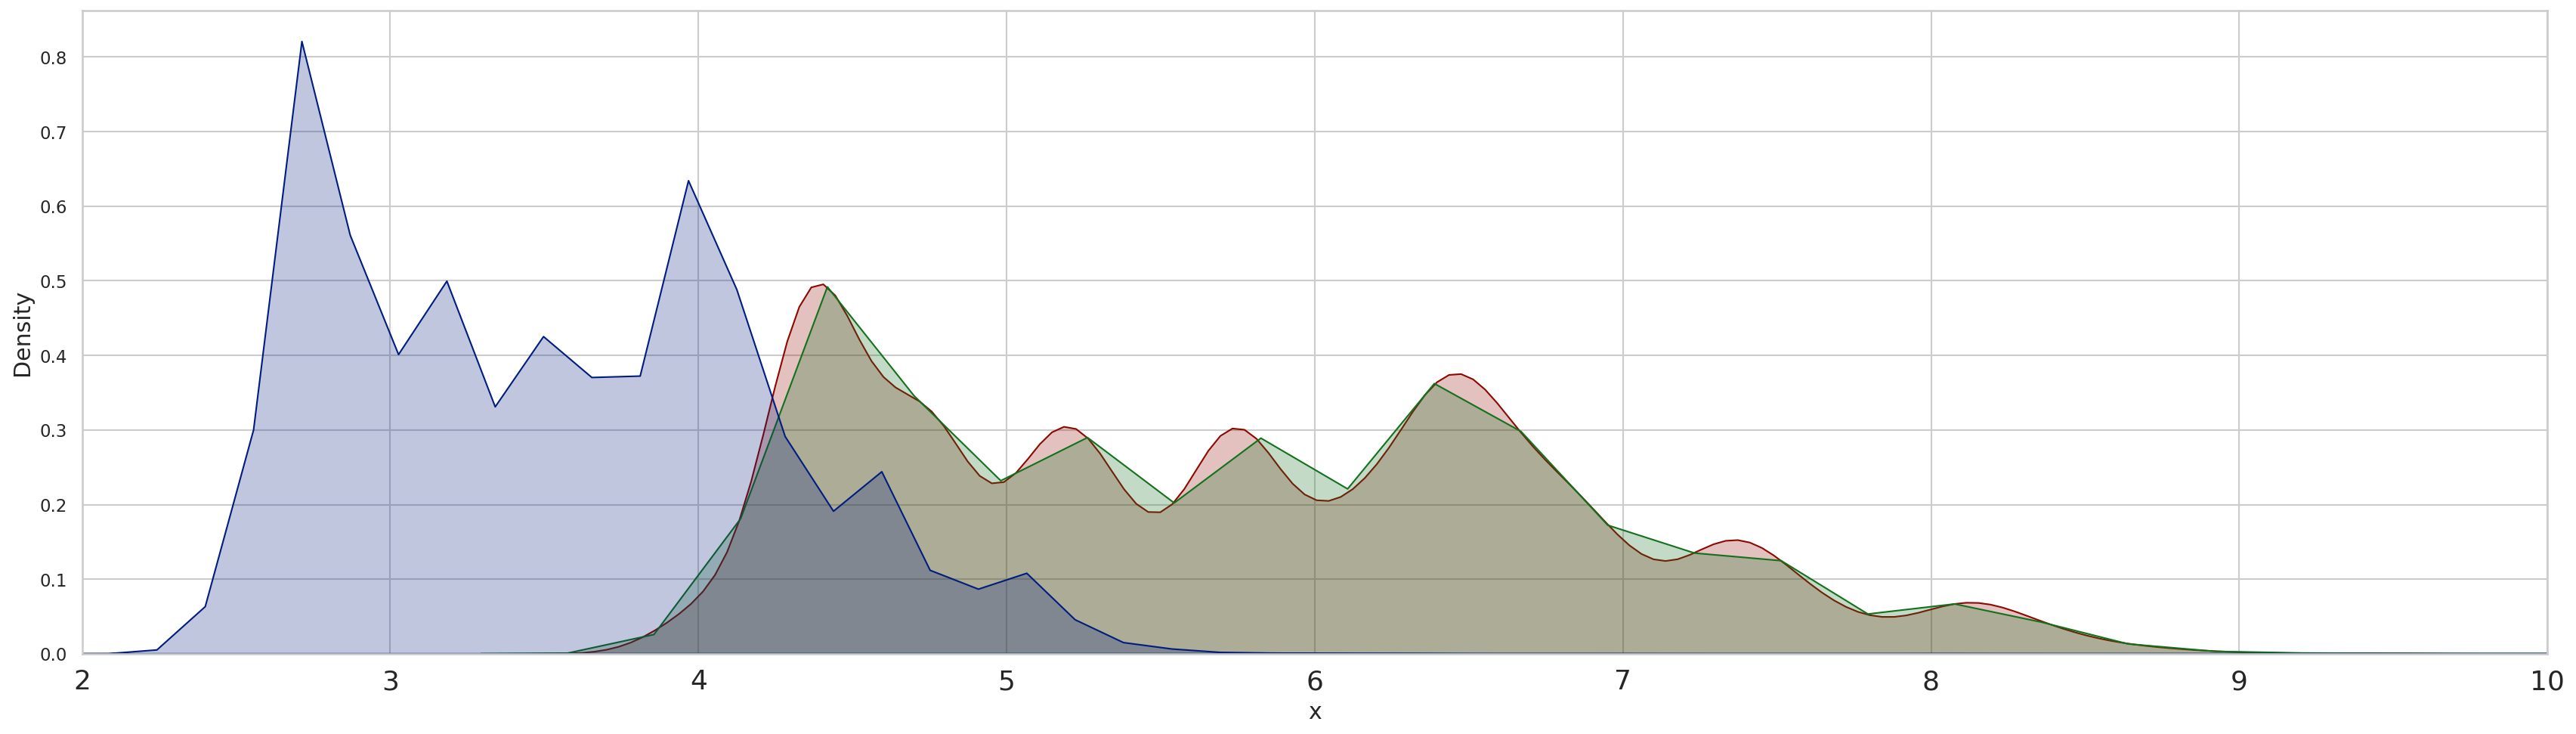

In [27]:
sns.kdeplot(df['x'], fill=True, color='r')
sns.kdeplot(df['y'], fill=True, color='g')
sns.kdeplot(df['z'], fill=True, color='b')
plt.xlim(2, 10)

# Feature Engineering

1) Create new Feature 'Volume'

In [28]:
df['volume'] = df['x'] * df['y'] * df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0.0, 50000.0)

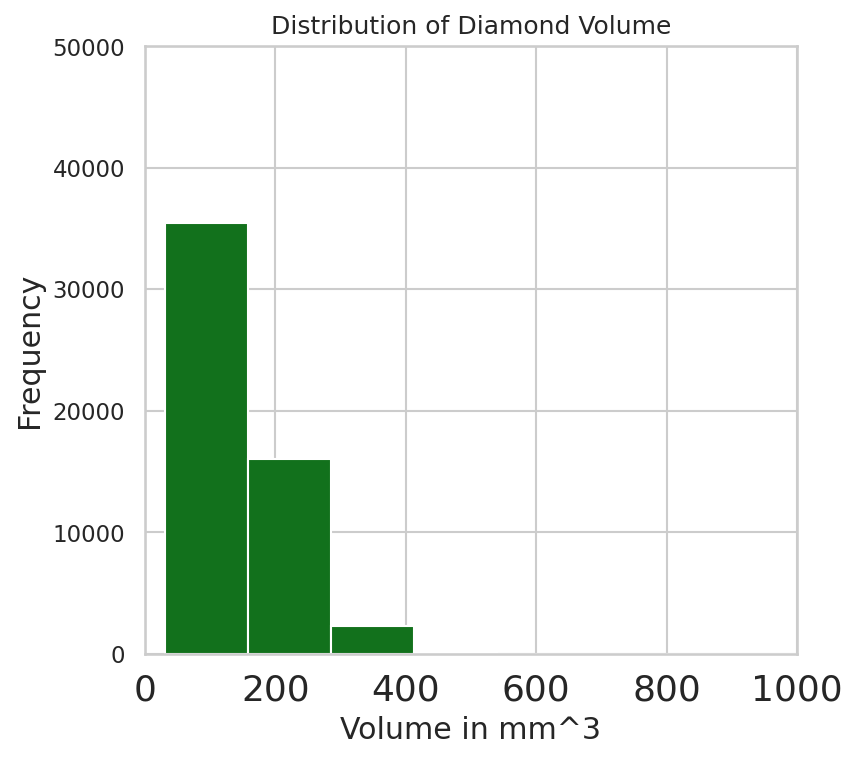

In [29]:
plt.figure(figsize=(5, 5))
plt.hist(x=df['volume'], bins=30, color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Volume')
plt.xlim(0, 1000)
plt.ylim(0, 50000)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


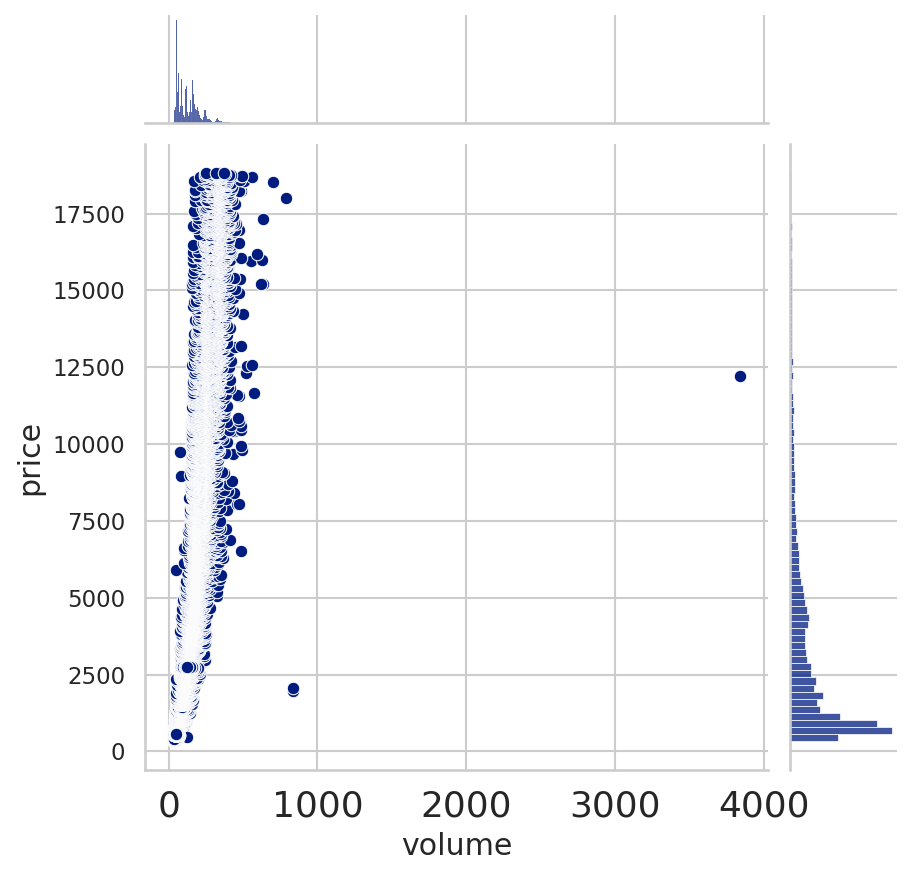

In [30]:
sns.jointplot(x='volume', y = 'price', data=df)

Looks like linear relationship between Price and Volume

2) drop x, y, z ( Dimensions )

In [31]:
df.drop(['x', 'y', 'z'], axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


# Feature Encoding

- Labeling the Categorical Features with digits to Distinguish, As we can't feed String data for Modelling

In [32]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()

df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [33]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


# Feature Scaling

- Divding the dataset into train and test for Algos

In [34]:
# split the data into train and test
X = df.drop(['price'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [35]:
# Appying Feature Scaling ( StandardScaler ), MinMaxScaler can also be applied
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Modelling Algos

In [36]:
# Collect all R2 Scores.
R2_Scores = []
models = ['Linear Regression', 'Lasso Regression', 'AdaBoost Regression', 'Ridge Regression', 'GradientBoosting Regression', 
          'RandomForest Regerssion', 'KNeighours Regression']

1) Linear Regression

In [37]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)
accurracies = cross_val_score(estimator=clf_lr, X=X_train, y=y_train, cv=5, verbose=1)
y_pred = clf_lr.predict(X_test)
print('')
print('--------- Linear Regression ---------')
print('Score : %.4f ' % clf_lr.score(X_test, y_test))
print(accurracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE      : %0.2f ' % mse)
print('MAE      : %0.2f ' % mae)
print('RMSE     : %0.2f ' % rmse)
print('R2       : %0.2f ' % r2)

R2_Scores.append(r2)



--------- Linear Regression ---------
Score : 0.8814 
[0.87116164 0.88350756 0.87757769 0.87635168 0.88384912]

MSE      : 1911398.80 
MAE      : 926.72 
RMSE     : 1382.53 
R2       : 0.88 


2) Lasso Regression

In [38]:
clf_la = Lasso()
clf_la.fit(X_train, y_train)
accurracies = cross_val_score(estimator= clf_la, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('------ Lasso Regression ------')
print('Score    : %.4f' % clf_la.score(X_test, y_test))
print(accurracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE      : %0.2f ' % mse)
print('MAE      : %0.2f ' % mae)
print('RMSE     : %0.2f ' % rmse)
print('R2       : %0.2f ' % r2)

R2_Scores.append(r2)



------ Lasso Regression ------
Score    : 0.8814
[0.87146434 0.88349434 0.87757734 0.87636606 0.88384393]

MSE      : 1911408.72 
MAE      : 926.25 
RMSE     : 1382.54 
R2       : 0.88 


3) AdaBoost Regression

In [39]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train, y_train)
accurracies = cross_val_score(estimator=clf_ar, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('------- AdaBoost Regression -------')
print('Score    : %.4f' %clf_ar.score(X_test, y_test))
print(accurracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE      : %0.2f ' % mse)
print('MAE      : %0.2f ' % mae)
print('RMSE     : %0.2f ' % rmse)
print('R2       : %0.2f ' % r2)

R2_Scores.append(r2)



------- AdaBoost Regression -------
Score    : 0.8981
[0.86355977 0.89116576 0.88762016 0.89646599 0.88245067]

MSE      : 1643350.01 
MAE      : 885.66 
RMSE     : 1281.93 
R2       : 0.90 


4) Ridge Regression

In [40]:
clf_rr = Ridge()
clf_rr.fit(X_train, y_train)
accurracies = cross_val_score(estimator=clf_rr, X=X_train, y=y_train, cv=5, verbose=1)
y_pred = clf_rr.predict(X_test)
print('')
print('------- Ridge Regression -------')
print('Score    : %.4f' % clf_rr.score(X_test, y_test))
print(accurracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE      : %0.2f ' % mse)
print('MAE      : %0.2f ' % mae)
print('RMSE     : %0.2f ' % rmse)
print('R2       : %0.2f ' % r2)

R2_Scores.append(r2)


------- Ridge Regression -------
Score    : 0.8814
[0.87094576 0.88350862 0.87757823 0.87635359 0.88384919]

MSE      : 1911385.59 
MAE      : 926.70 
RMSE     : 1382.53 
R2       : 0.88 


5) GradientBoosting Regression

In [41]:
clf_gr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, verbose=1)
clf_gr.fit(X_train, y_train)
accurracies = cross_val_score(estimator=clf_gr, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_gr.predict(X_test)
print('')
print('------- GradientBoosting Regression -------')
print('Score    : %.4f' % clf_gr.score(X_test, y_test))
print(accurracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE      : %0.2f ' % mse)
print('MAE      : %0.2f ' % mae)
print('RMSE     : %0.2f ' % rmse)
print('R2       : %0.2f ' % r2)

R2_Scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1    14009477.5296            1.70s
         2    12437807.7359            1.64s
         3    11113339.5845            1.62s
         4     9945244.2308            1.57s
         5     8973416.9156            1.56s
         6     8109014.7842            1.55s
         7     7387120.0500            1.54s
         8     6753937.9878            1.52s
         9     6197182.6819            1.51s
        10     5724689.0901            1.49s
        20     3200362.4597            1.33s
        30     2393542.3170            1.15s
        40     2102586.3335            0.99s
        50     1923964.9187            0.83s
        60     1790574.6006            0.66s
        70     1688380.2826            0.50s
        80     1609829.0076            0.33s
        90     1548089.0039            0.17s
       100     1499127.4566            0.00s
      Iter       Train Loss   Remaining Time 
         1    13994442.1962            1.38s
        

6) RandomForest Regression

In [42]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)
accurracies = cross_val_score(estimator=clf_rf, X=X_train, y=y_train, cv = 5, verbose=1)
y_pred = clf_rf.predict(X_test)
print('')
print('------- RandomForest Regression -------')
print('Score    : %.4f' % clf_rf.score(X_test, y_test))
print(accurracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE      : %0.2f ' % mse)
print('MAE      : %0.2f ' % mae)
print('RMSE     : %0.2f ' % rmse)
print('R2       : %0.2f ' % r2)

R2_Scores.append(r2)


------- RandomForest Regression -------
Score    : 0.9823
[0.97941297 0.98066416 0.98155342 0.97724533 0.98127472]

MSE      : 285428.30 
MAE      : 271.12 
RMSE     : 534.25 
R2       : 0.98 


Tuning Parameters

In [43]:
no_of_test=[100]
params_dict={'n_estimators': no_of_test, 'n_jobs':[-1], 'max_features': ['auto', 'sqrt', 'log2']}
clf_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params_dict, scoring='r2')
clf_rf.fit(X_train, y_train)
print('Score    : %.4f' % clf_rf.score(X_test, y_test))
pred = clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2   : %0.2f' % r2)
# R2_Scores.append(r2)


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Score    : 0.9823
R2   : 0.98


7) KNeighbours Regression

In [44]:
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train, y_train)
accurracies = cross_val_score(estimator=clf_knn, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('------- KNeighbours Regression -------')
print('Score    : %.4f' % clf_knn.score(X_test, y_test))
print(accurracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE      : %0.2f ' % mse)
print('MAE      : %0.2f ' % mae)
print('RMSE     : %0.2f ' % rmse)
print('R2       : %0.2f ' % r2)

R2_Scores.append(r2)


------- KNeighbours Regression -------
Score    : 0.9590
[0.95428659 0.9585707  0.95505953 0.94931709 0.95517563]

MSE      : 660422.13 
MAE      : 425.14 
RMSE     : 812.66 
R2       : 0.96 


Tuning Parameters

In [45]:
n_neighbors=[]
for i in range(0, 50, 5):
    if(i!=0):
        n_neighbors.append(i)

params_dict = {'n_neighbors':n_neighbors, 'n_jobs':[-1]}
clf_knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=params_dict, scoring='r2')
clf_knn.fit(X_train, y_train)
print('Score    : %.4f' % clf_knn.score(X_test, y_test))
pred = clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2   : %0.2f' % r2)
# R2_Scores.append(r2)

Score    : 0.9590
R2   : 0.96


# Visualizing R2-Score of Algos

In [46]:
compare = pd.DataFrame({'Algorithms' : models, 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores', ascending=False)

,Algorithms,R2-Scores
5,RandomForest Regerssion,0.982294
6,KNeighours Regression,0.959033
4,GradientBoosting Regression,0.905833
2,AdaBoost Regression,0.898060
3,Ridge Regression,0.881433
0,Linear Regression,0.881432
1,Lasso Regression,0.881431


<Axes: xlabel='R2-Scores', ylabel='Algorithms'>

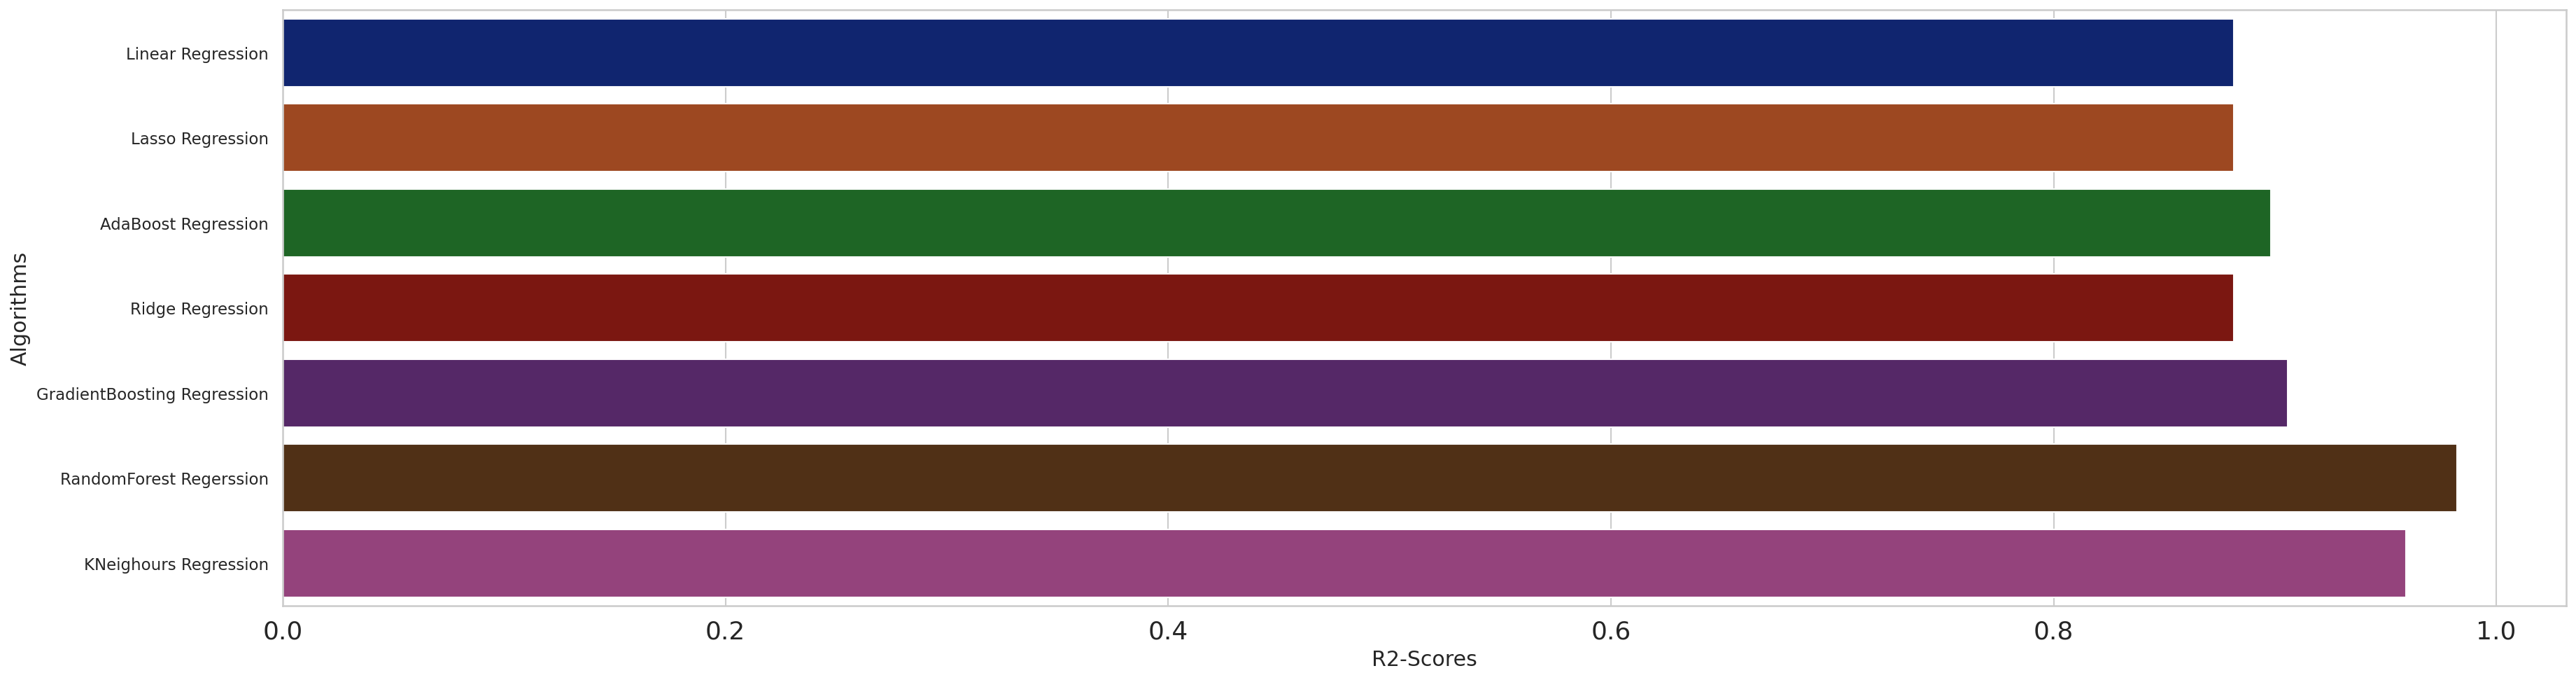

In [47]:
sns.barplot(x = 'R2-Scores', y= 'Algorithms', data = compare)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


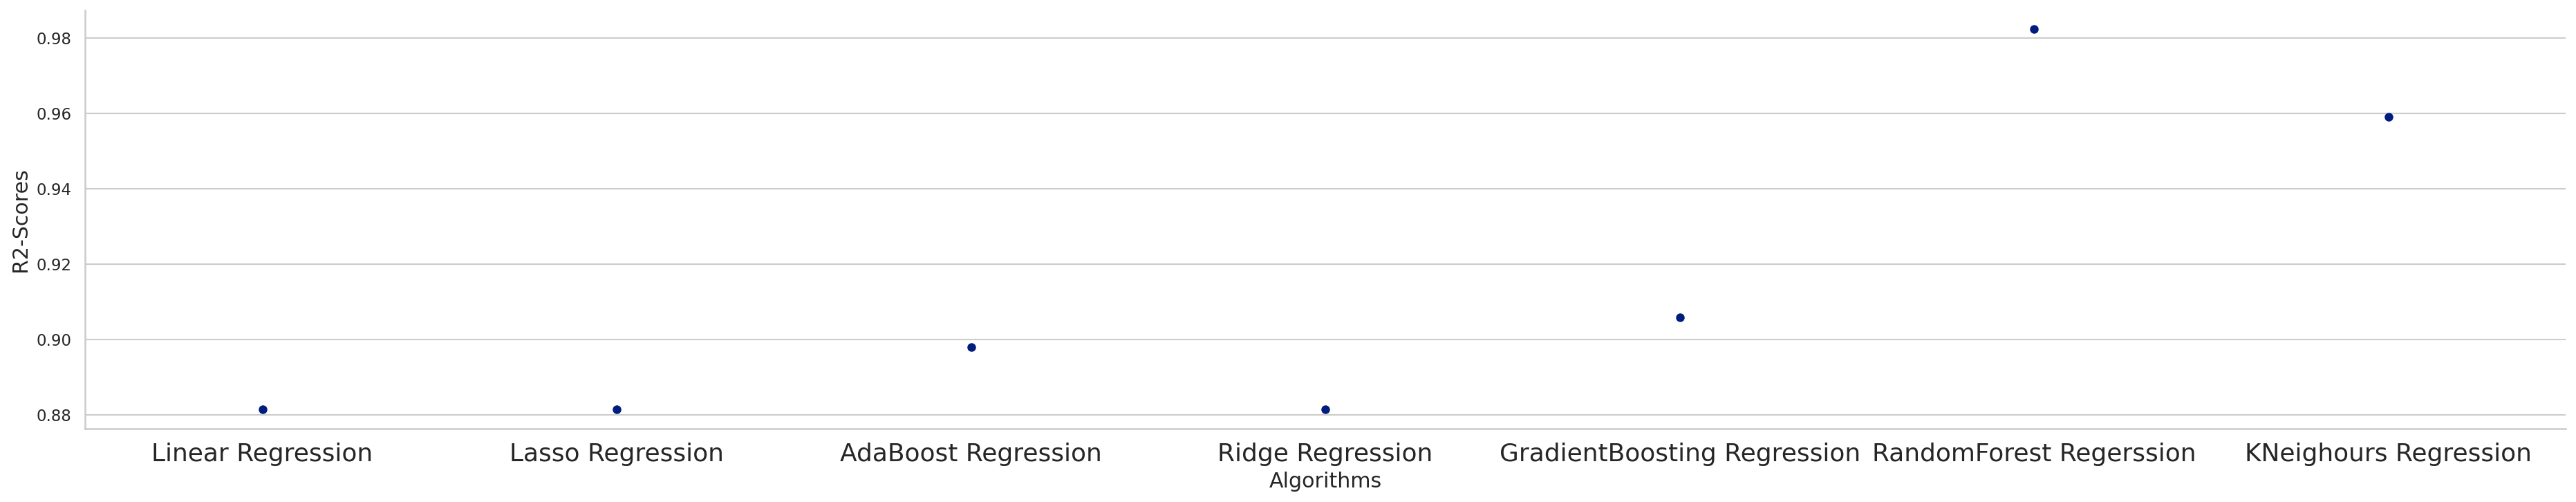

In [48]:
sns.catplot(x = 'Algorithms', y = 'R2-Scores', data = compare, size=6, aspect=5)

RandomForest Regressor gives us the highest R2 Score ( (coefficient of determination) regression score ) [98%]

# End